In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

import pandas as pd

from src.utils import *

# Load the data
goog_df = load_data('D:/Kifiya AI/financial-news-analysis/data/yfinance_data/GOOG_historical_data.csv')
processed_df = load_data('D:/Kifiya AI/financial-news-analysis/data/processed_data.csv')

# Display the first few rows of Google's stock data

In [2]:
print(goog_df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
#data types of each column
print(goog_df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [4]:
#summary of dataframe
print(goog_df.describe())

              Open         High          Low        Close    Adj Close  \
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000   
mean     45.251315    45.728793    44.800587    45.274515    45.224493   
std      43.338635    43.818298    42.918167    43.377299    43.332534   
min       2.470490     2.534002     2.390042     2.490913     2.488082   
25%      13.034705    13.145415    12.881592    13.032090    13.017277   
50%      26.982210    27.194902    26.791387    27.005927    26.975230   
75%      60.215126    60.758375    59.811811    60.280252    60.211734   
max     191.750000   193.309998   190.619995   192.660004   192.660004   

             Volume    Dividends  Stock Splits  
count  5.020000e+03  5020.000000   5020.000000  
mean   1.157539e+08     0.000040      0.004583  
std    1.497936e+08     0.002823      0.284034  
min    1.584340e+05     0.000000      0.000000  
25%    2.733950e+07     0.000000      0.000000  
50%    5.585480e+07     0.000000      0

In [5]:
# check for missing values
missing_values = goog_df.isnull().sum()
print(missing_values)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


  ## Data Preprocessing
# Convert the Date columns in both datasets to datetime format to enable time-series analysis

In [6]:
goog_df['Date'] = pd.to_datetime(goog_df['Date'])

In [7]:
duplicates = goog_df.index.duplicated().sum()
print(f"Number of duplicate dates: {duplicates}")

Number of duplicate dates: 0


## Quantitative Analysis

# Simple Moving Average (SMA) of 250 period

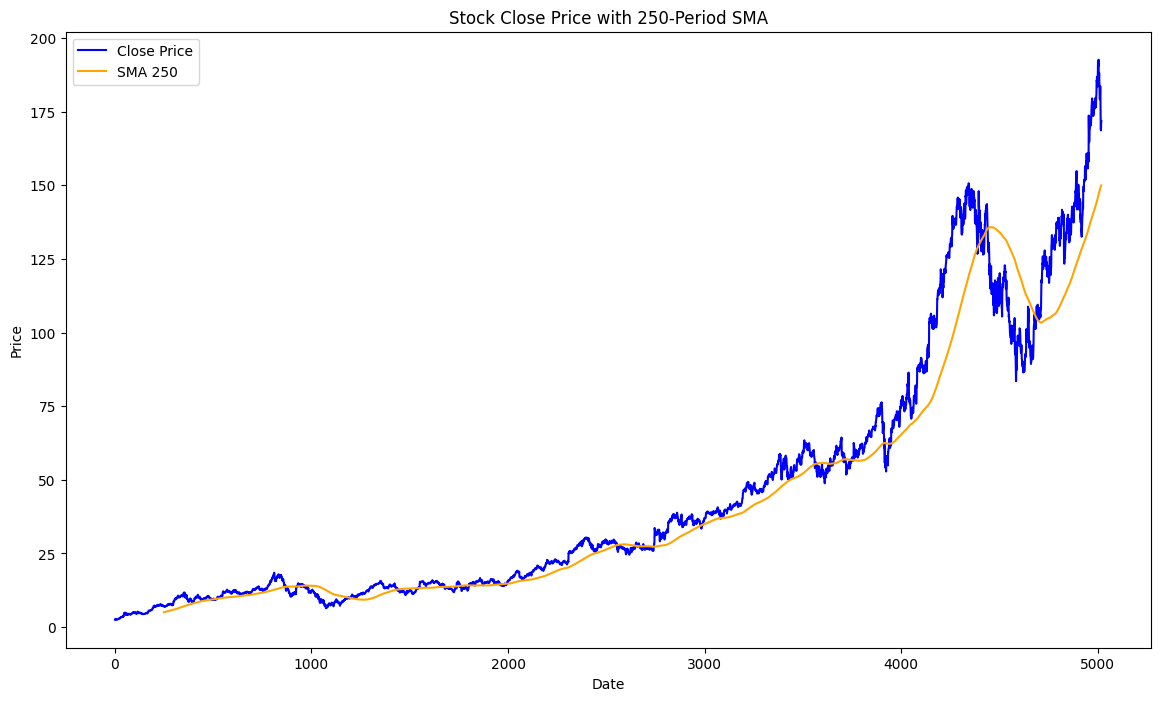

In [8]:
# Plot SMA
plot_sma(goog_df, timeperiod=250)

# Relative Strength Index (RSI) of 30 period

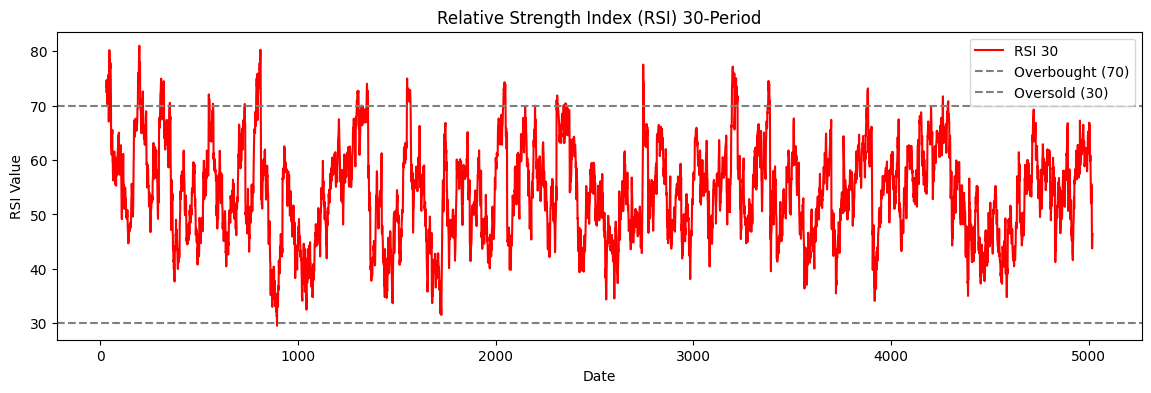

In [9]:
# Plot RSI
plot_rsi(goog_df, timeperiod=30)


# Moving average convergence divergence (macd)

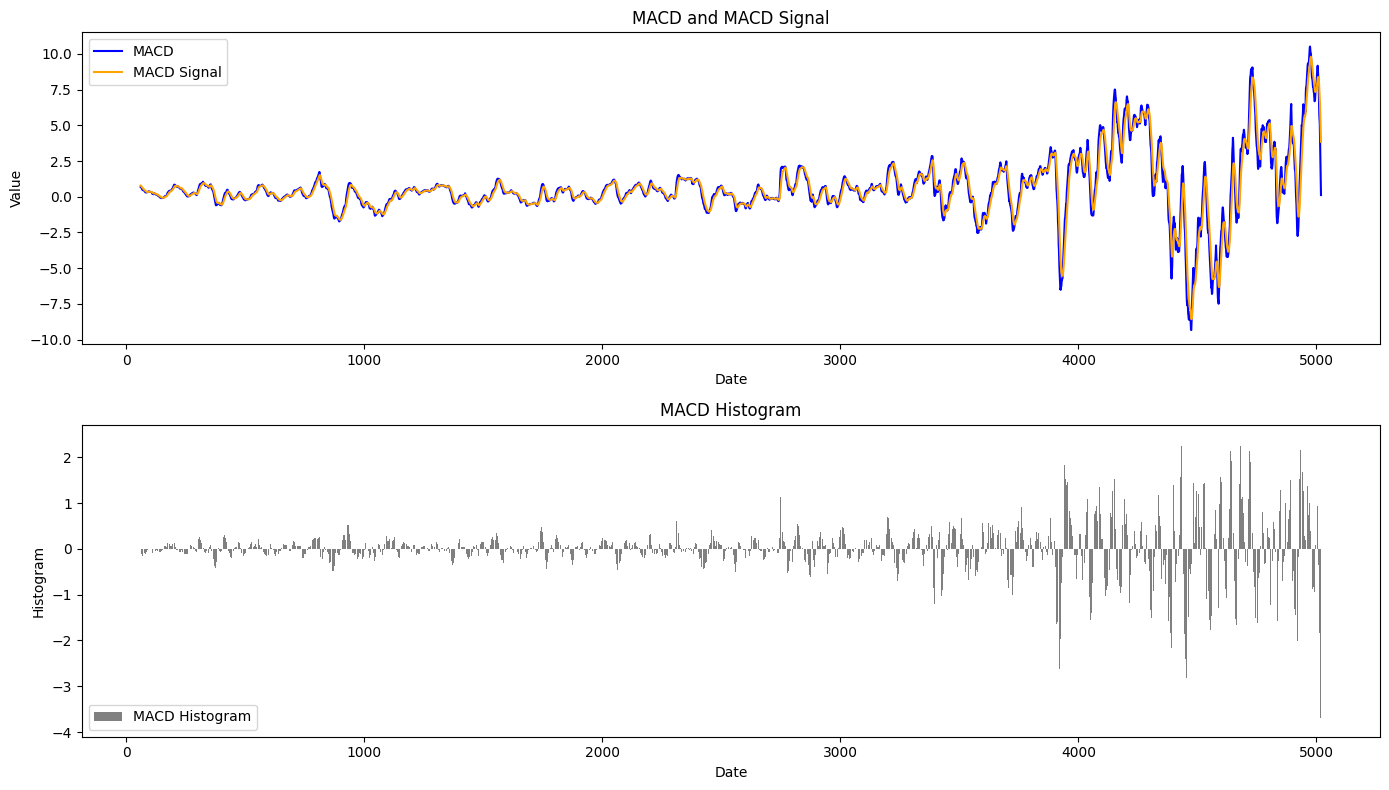

In [10]:
# Plot MACD
plot_macd(goog_df, fastperiod=15, slowperiod=50, signalperiod=12)

## Filtering data related to GOOGLE and merging it with the financial data of google

# Stock Movements